In [1]:
try:
    import filterpy
except:
    !pip install filterpy
    import filterpy
    
    
try:
    import sympy;
except:
    !pip install sympy
    import sympy;

In [2]:
# %matplotlib inline

In [3]:
#format the book
import book_format
book_format.set_style();

In [4]:
import numpy as np
import matplotlib.pyplot as plt


from kf_book.gaussian_internal import plot_height_std
from numpy.random import randn
from filterpy.stats import plot_gaussian_pdf
import kf_book.book_plots as book_plots
from filterpy.stats import gaussian

<h1>Thought Experiment: Two Observations</h1>

Say, we have two weighing machines A and B; and the two give your measurement as 160kg and 170kg. Which measurement would you trust more?

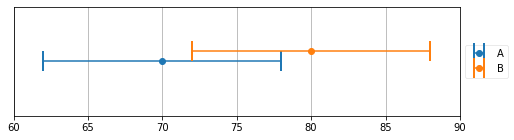

In [6]:
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars
plot_errorbars([(70, 8, 'A'), (80, 8, 'B')], xlims=(60, 90))

Say, we know that A (error = 3) is more precise than B (error = 9); then..?

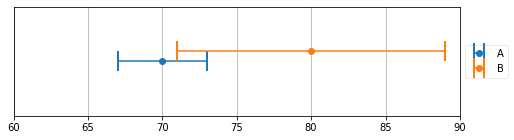

In [7]:
plot_errorbars([(70, 3, 'A'), (80, 9, 'B')], xlims=(60, 90))

In [8]:
import math
from ipywidgets import interact, FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)
    plt.show()

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

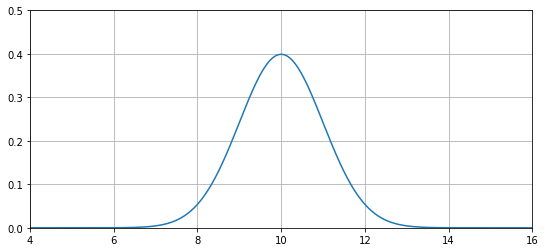

In [9]:
import filterpy.stats as stats
stats.plot_gaussian_pdf(mean=10., variance=1., 
                        xlim=(4, 16), ylim=(0, .5));


In [10]:


from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: f'𝒩(μ={s[0]:.3f}, 𝜎²={s[1]:.3f})'

def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

def update(prior, likelihood):
    posterior = gaussian_multiply(likelihood, prior)
    return posterior

# test the update function
predicted_pos = gaussian(10., .2**2)
measured_pos = gaussian(11., .1**2)
estimated_pos = update(predicted_pos, measured_pos)
estimated_pos

𝒩(μ=10.800, 𝜎²=0.008)

<h1>Thought Experiment: Repeated Observations</h1>

𝒩(μ=10.000, 𝜎²=0.500)


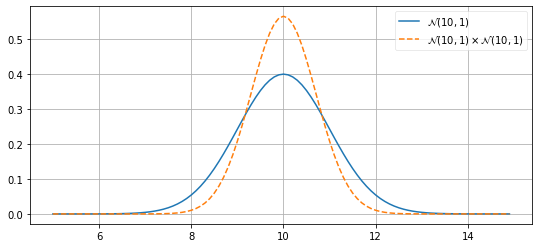

In [13]:
z = gaussian(10., 1.)  # Gaussian N(10, 1)

product = gaussian_multiply(z, z)

xs = np.arange(5, 15, 0.1)
ys = [stats.gaussian(x, z.mean, z.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1)$')

ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
plt.plot(xs, ys, label='$\mathcal{N}(10,1) \\times \mathcal{N}(10,1)$', ls='--')
plt.legend()
print(product)

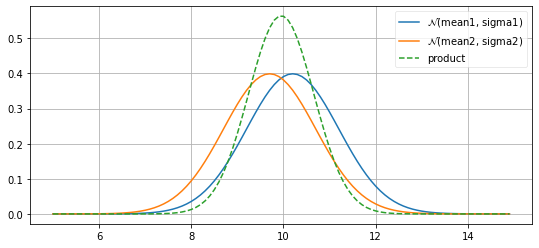

In [14]:
def plot_products(g1, g2): 
    plt.figure()
    product = gaussian_multiply(g1, g2)

    xs = np.arange(5, 15, 0.1)
    ys = [stats.gaussian(x, g1.mean, g1.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$' + f'(mean1, sigma1)')

    ys = [stats.gaussian(x, g2.mean, g2.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$' + f'(mean2, sigma2)')

    ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
    plt.plot(xs, ys, label='product', ls='--')
    plt.legend();
    plt.show()
    
z1 = gaussian(10.2, 1)
z2 = gaussian(9.7, 1)
 
plot_products(z1, z2)

<h1>Thought Experiment: Two Observations with Different Confidence values</h1>

In [17]:
from ipywidgets import interact

def interactive_gaussian(m1, m2, v1, v2):
    g1 = gaussian(m1, v1)
    g2 = gaussian(m2, v2)
    plot_products(g1, g2)
    
interact(interactive_gaussian,
         m1=(5, 10., .5), m2=(10, 15, .5), 
         v1=(.1, 2, .1), v2=(.1, 2, .1));

interactive(children=(FloatSlider(value=7.5, description='m1', max=10.0, min=5.0, step=0.5), FloatSlider(value…

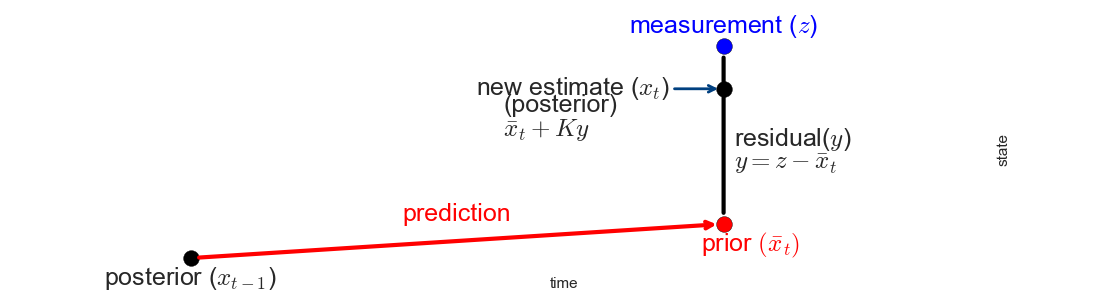

In [14]:
import filterpy.kalman as kf
kf.predict(x=10., P=3., u=1., Q=4.)

(11.0, 7.0)

In [15]:
x, P = kf.predict(x=10., P=3., u=1., Q=2.**2)
print(f'{x:.3f}')

x, P = kf.update(x=x, P=P, z=12., R=3.5**2)
print(f'{x:.3f} {P:.3f}')

11.000
11.364 4.455
